In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
rating_path = '../data/rating.csv'
traffic_path = '../data/traffic.csv'
data_path = '../data/data.csv'
loc_path = '../data/domains_location.csv'

In [5]:
rating_df = pd.read_csv(rating_path)
traffic_df = pd.read_csv(traffic_path)
data_df = pd.read_csv(data_path)
loc_df = pd.read_csv(loc_path)

In [6]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   GlobalRank      1000000 non-null  int64 
 1   TldRank         1000000 non-null  int64 
 2   Domain          1000000 non-null  object
 3   TLD             1000000 non-null  object
 4   RefSubNets      1000000 non-null  int64 
 5   RefIPs          1000000 non-null  int64 
 6   IDN_Domain      1000000 non-null  object
 7   IDN_TLD         1000000 non-null  object
 8   PrevGlobalRank  1000000 non-null  int64 
 9   PrevTldRank     1000000 non-null  int64 
 10  PrevRefSubNets  1000000 non-null  int64 
 11  PrevRefIPs      1000000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 91.6+ MB


In [8]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB


In [ ]:
rating_df.isnull().sum()

article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
region             49209
dtype: int64

In [ ]:
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCommonName  37802 non-null  object
 1   location          37802 non-null  object
 2   Country           37801 non-null  object
dtypes: object(3)
memory usage: 886.1+ KB


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB


In [ ]:
data_df.isnull().sum()

article_id          0
source_id       80880
source_name         0
author           8219
title              40
description       383
url                 0
url_to_image     5624
published_at        0
content             0
category           42
full_content    46943
dtype: int64

In [ ]:
# Unique Number of Sources

rating_df['source_name'].unique()

array(['Forbes', 'CNA', 'Time', 'Phys.Org', 'Digital Trends',
       'Al Jazeera English', 'BBC News', 'Deadline', 'Euronews', 'RT',
       'The Punch', 'International Business Times', 'The Indian Express',
       'ETF Daily News', 'ABC News', 'Globalsecurity.org',
       'Marketscreener.com', 'The Times of India', 'GlobeNewswire', 'CNN',
       'Business Insider', 'Gizmodo.com', 'Wired', 'The Verge', 'NPR',
       'Boing Boing', 'Android Central', 'ReadWrite',
       'AllAfrica - Top Africa News'], dtype=object)

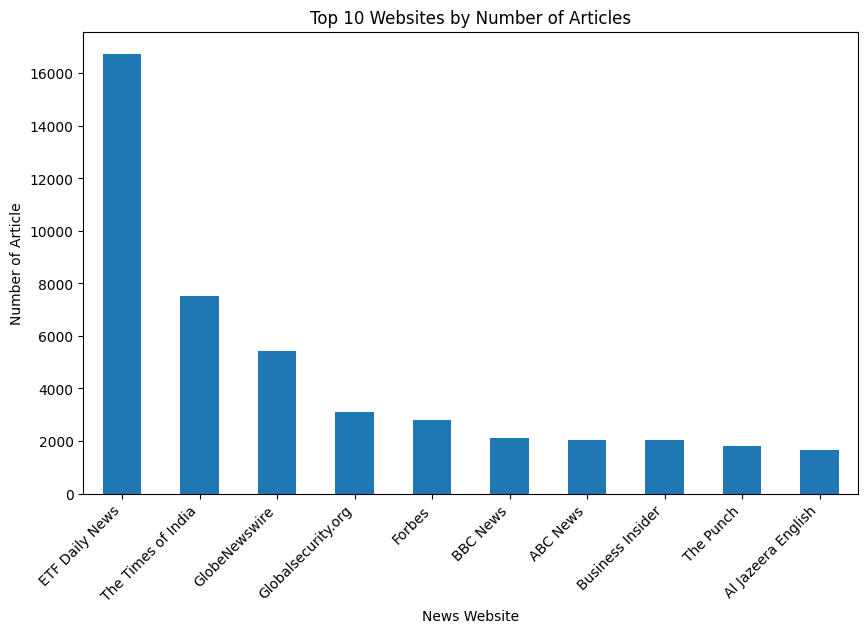

In [ ]:
#Top 10 websites that have the largest count of news articles
top_10_web = rating_df['source_name'].value_counts().head(10)

plt.figure(figsize = (10,6))
top_10_web.plot(kind = 'bar')
plt.title('Top 10 Websites by Number of Articles')
plt.xlabel('News Website')
plt.ylabel('Number of Article')
plt.xticks(rotation=45, ha="right")
plt.show()


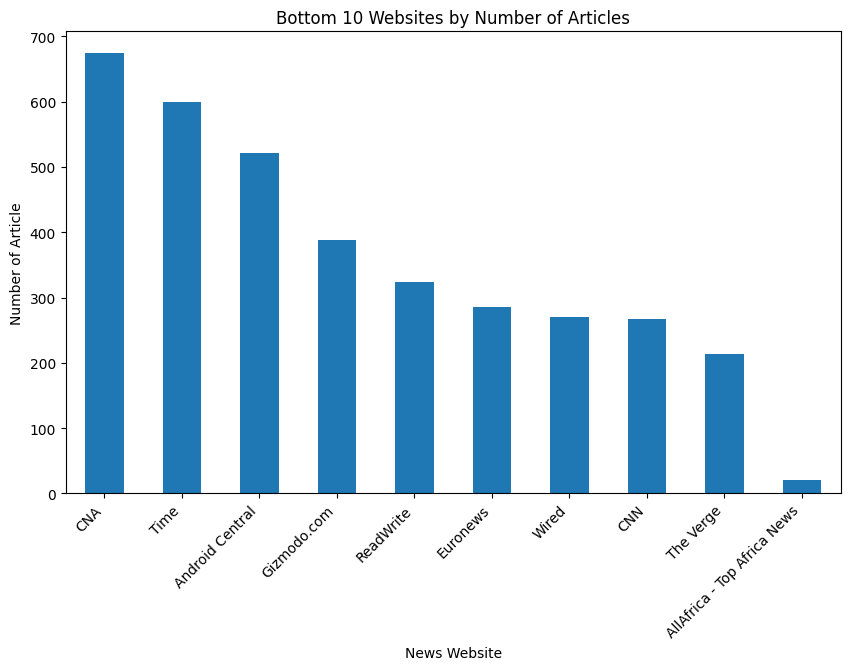

In [ ]:
#Bottom 10 websites that have the largest count of news articles
bottom_10_web = rating_df['source_name'].value_counts().tail(10)

plt.figure(figsize = (10,6))
bottom_10_web.plot(kind = 'bar')
plt.title('Bottom 10 Websites by Number of Articles')
plt.xlabel('News Website')
plt.ylabel('Number of Article')
plt.xticks(rotation=45, ha="right")
plt.show()


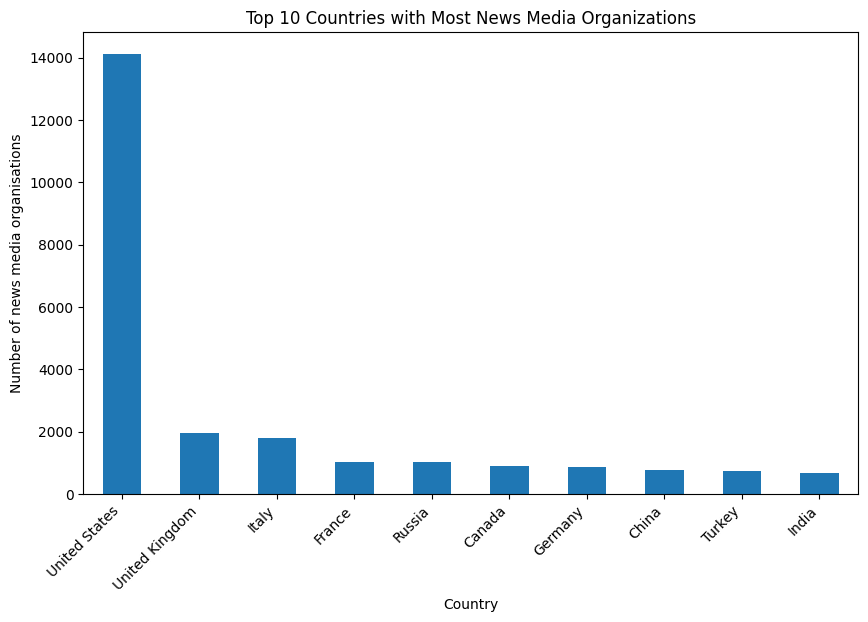

In [ ]:
# Top 10 Countries with the highest number of news media organisations
Top_10_country = loc_df.groupby('Country')['SourceCommonName'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
Top_10_country.plot(kind = 'bar')
plt.title('Top 10 Countries with Most News Media Organizations')
plt.xlabel('Country')
plt.ylabel('Number of news media organisations')
plt.xticks(rotation=45, ha="right")
plt.show()

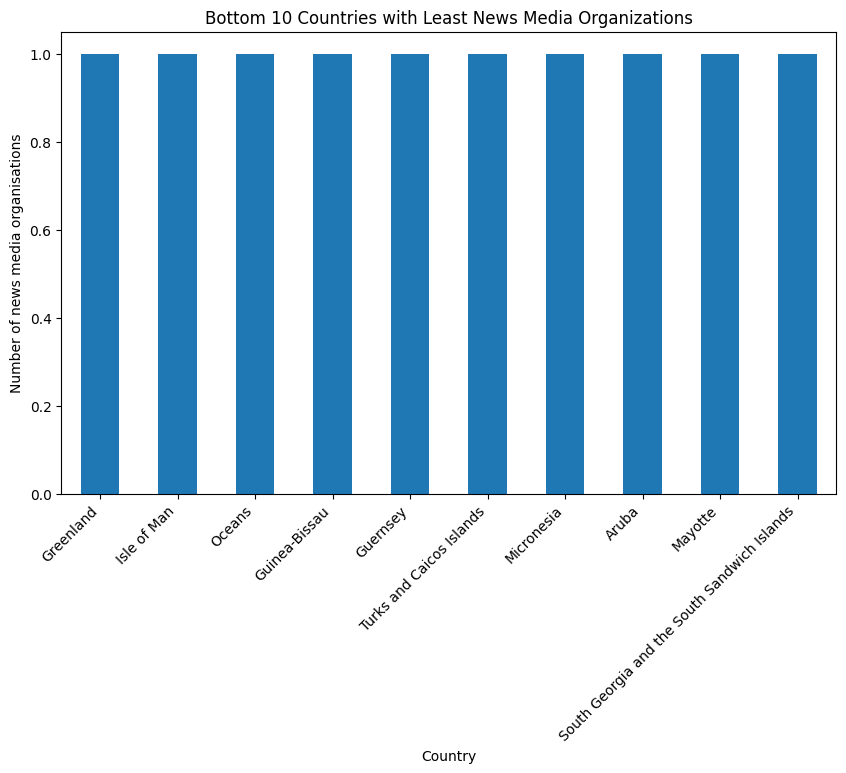

In [ ]:
# Bottom 10 Countries with the highest number of news media organisations
Bottom_10_country = loc_df.groupby('Country')['SourceCommonName'].count().sort_values().head(10)

plt.figure(figsize=(10,6))
Bottom_10_country.plot(kind = 'bar')
plt.title('Bottom 10 Countries with Least News Media Organizations')
plt.xlabel('Country')
plt.ylabel('Number of news media organisations')
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-27-4be3a69c64ef>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rating_country = rating_df[data_df['category'].isin(countries)]


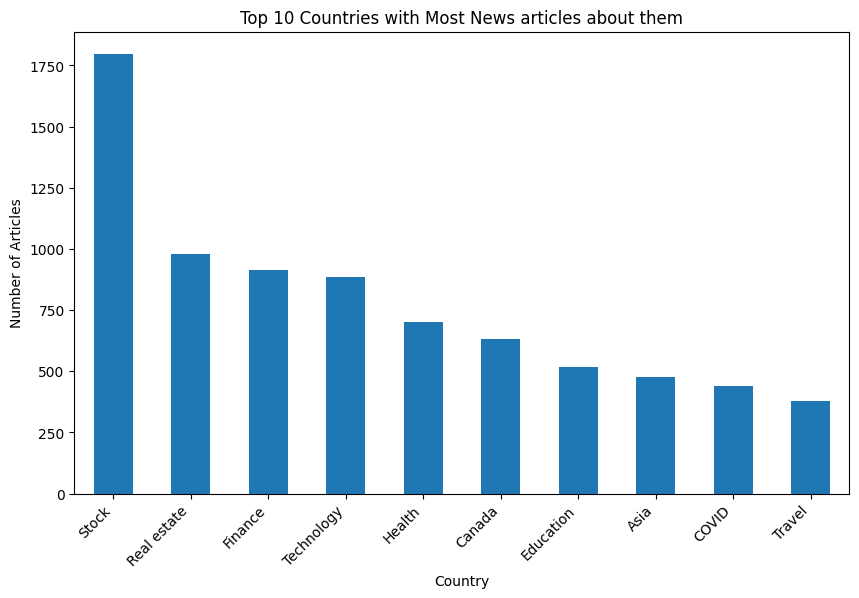

In [ ]:
# Top 10 Countries that have many articles written about them - the content of the news is about that country
countries = loc_df['Country'].tolist()
rating_country = rating_df[data_df['category'].isin(countries)]

Top_10_country_art = rating_country['category'].value_counts()[:10]

plt.figure(figsize=(10,6))
Top_10_country_art.plot(kind = 'bar')
plt.title('Top 10 Countries with Most News articles about them')
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")
plt.show()

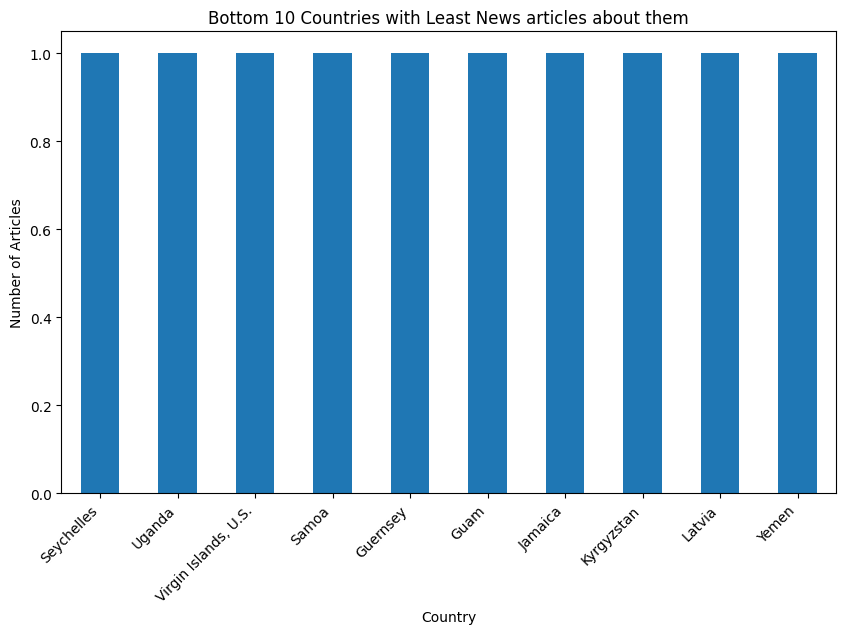

In [ ]:
# Top 10 Countries that have many articles written about them - the content of the news is about that country
Top_10_country_art = rating_country['category'].value_counts()[-10:]

plt.figure(figsize=(10,6))
Top_10_country_art.plot(kind = 'bar')
plt.title('Bottom 10 Countries with Least News articles about them')
plt.xlabel('Country')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
country_regions = {
    'Africa': ['Senegal', 'Egypt', 'South Africa', 'Cameroon', 'Nigeria', 'Ethiopia', 'Kenya', 'Morocco', 'Ghana', 'Angola', 'Tunisia', 'Libya', 'Sudan', 'Uganda', 'Ivory Coast', 'Mali', 'Somalia', 'Zimbabwe', 'Tanzania', 'Zambia', 'Mozambique', 'Rwanda', 'Madagascar', 'Sierra Leone', 'Liberia', 'Guinea', 'Burkina Faso', 'Niger', 'Chad', 'Congo', 'Mauritania', 'Namibia', 'Botswana', 'Swaziland', 'Lesotho', 'Equatorial Guinea', 'Gabon', 'Eritrea', 'Djibouti', 'Comoros', 'Sao Tome and Principe', 'Seychelles', 'Mayotte', 'Reunion', 'Western Sahara'],
    'US': ['United States'],
    'China': ['China', 'Taiwan', 'Hong Kong', 'Macau'],
    'EU': ['France', 'Italy', 'Germany', 'United Kingdom', 'Spain', 'Netherlands', 'Greece', 'Portugal', 'Belgium', 'Sweden', 'Austria', 'Denmark', 'Finland', 'Ireland', 'Czech Republic', 'Romania', 'Poland', 'Hungary', 'Slovak Republic', 'Luxembourg', 'Bulgaria', 'Croatia', 'Slovenia', 'Lithuania', 'Latvia', 'Estonia', 'Malta', 'Cyprus', 'Monaco'],
    'Russia': ['Russia'],
    'Ukraine': ['Ukraine'],
    'Middle East': ['Egypt', 'Iran', 'Saudi Arabia', 'Iraq', 'United Arab Emirates', 'Syria', 'Yemen', 'Israel', 'Jordan', 'Lebanon', 'Palestine', 'Oman', 'Kuwait', 'Qatar', 'Bahrain', 'Turkey', 'Cyprus']
}


def map_country_to_region(category):

  for region, countries in country_regions.items():
    if category in countries:
      return region
  return None


rating_df['region'] = rating_df['category'].apply(map_country_to_region)

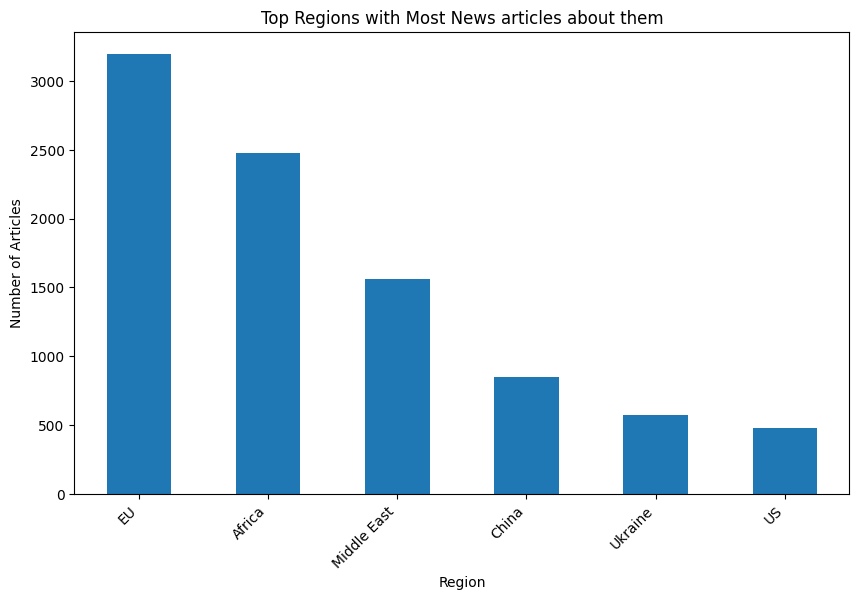

In [ ]:
# Top Regions that have many articles written about them
Top_region_art = rating_df['region'].value_counts()

plt.figure(figsize=(10,6))
Top_region_art.plot(kind = 'bar')
plt.title('Top Regions with Most News articles about them')
plt.xlabel('Region')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")
plt.show()

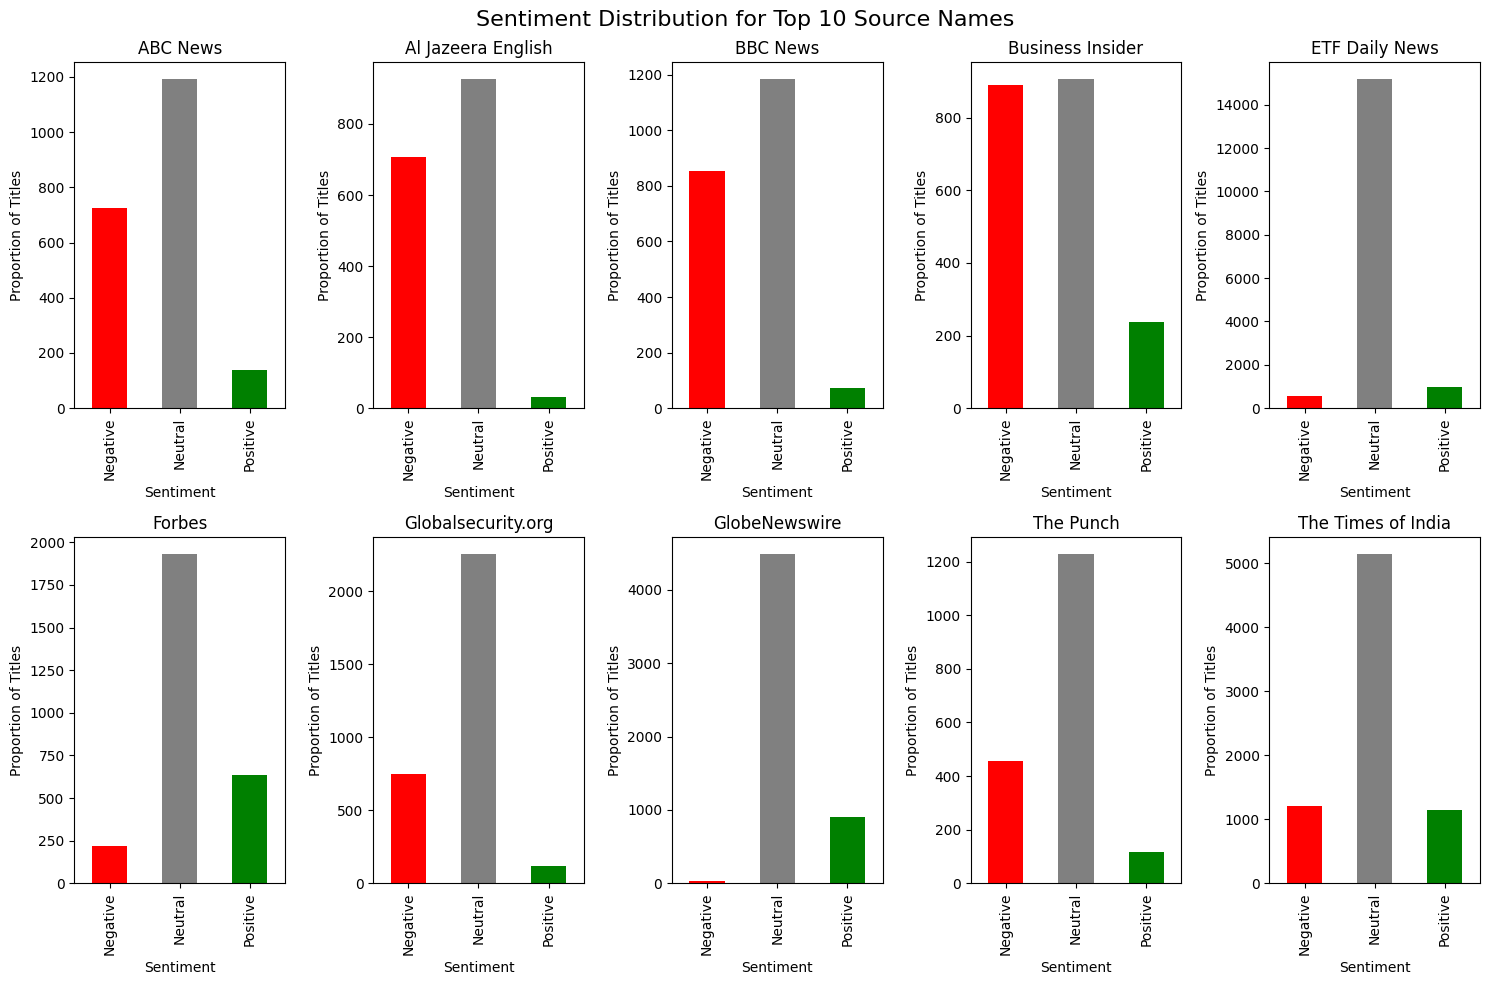

In [ ]:
# Top 10 sources with count of positive, neutral, and negative sentiment
top_10_sources = top_10_web.index.tolist()

# Filter data for top 10 sources
filtered_df = rating_df[rating_df['source_name'].isin(top_10_sources)]

# Calculate sentiment distribution (assuming separate positive, neutral, negative columns)
sentiment_by_source = filtered_df.groupby('source_name')['title_sentiment'].value_counts().unstack(fill_value=0)

# Define colors for each sentiment
sentiment_colors = {'Positive': 'green', 'Neutral': 'gray', 'Negative': 'red'}

# Create a single figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))  # Adjust rows and cols as needed

# Iterate through top 10 sources and plot on subplots
source_index = 0
for row in range(2):
  for col in range(5):
    if source_index >= len(sentiment_by_source):
      break
    source_name = sentiment_by_source.index[source_index]
    sentiment_counts = sentiment_by_source.iloc[source_index]
    sentiment_counts.plot(kind='bar', stacked=False, ax=axes[row, col], title=source_name, color=sentiment_counts.index.map(sentiment_colors))
    axes[row, col].set_xlabel("Sentiment")
    axes[row, col].set_ylabel("Proportion of Titles")
    source_index += 1

# Adjust layout (optional)
fig.suptitle(f"Sentiment Distribution for Top 10 Source Names",fontsize=16)
plt.tight_layout()
plt.show()

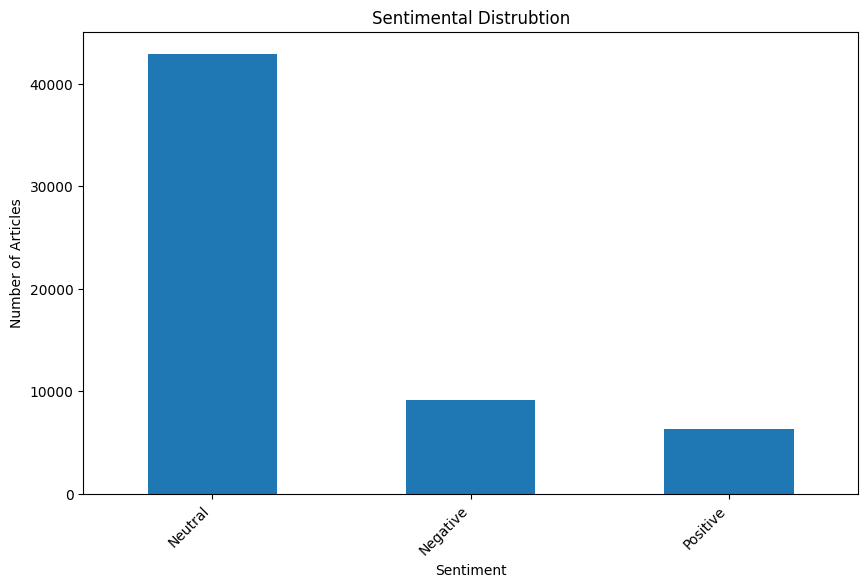

In [ ]:
# Sentimental Distrubtion
sentiment_count = rating_df['title_sentiment'].value_counts()

plt.figure(figsize=(10,6))
sentiment_count.plot(kind = 'bar')
plt.title('Sentimental Distrubtion')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha="right")
plt.show()